In [191]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from past.builtins import xrange

In [192]:
# image specification
img_rows,img_cols,img_depth=28,28,3

x_tr = []
x_count=[]

In [193]:
#only for count
listing = os.listdir('DATASET/')
cou=0
for vid in listing:
    listing2 = os.listdir('DATASET/'+vid)
    for vid2 in listing2:
        cou +=1
print(cou)

166105


In [194]:
listing = os.listdir('DATASET/')
for vid in listing:
    print(vid)
    counter =0
    listing2 = os.listdir('DATASET/'+vid)
    count2=0
    for vid2 in listing2:
        frames = []
        for k in xrange(img_depth):
            img_array = cv2.imread('DATASET/'+vid+'/'+vid2)  # convert to array
            frame=cv2.resize(img_array,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
        input=np.array(frames)
        #print input.shape
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        #print ipt.shape
        x_tr.append(ipt)
        counter +=1
        count2 +=1
        if count2 >= 1000:
            break;
    x_count.append([counter,int(vid)])

1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
9


In [195]:
X_tr_array = np.array(x_tr)
num_samples = len(X_tr_array)
print(num_samples)

84000


In [196]:
print(x_count)

[[1000, 1], [1000, 10], [1000, 11], [1000, 12], [1000, 13], [1000, 14], [1000, 15], [1000, 16], [1000, 17], [1000, 18], [1000, 19], [1000, 2], [1000, 20], [1000, 21], [1000, 22], [1000, 23], [1000, 24], [1000, 25], [1000, 26], [1000, 27], [1000, 28], [1000, 29], [1000, 3], [1000, 30], [1000, 31], [1000, 32], [1000, 33], [1000, 34], [1000, 35], [1000, 36], [1000, 37], [1000, 38], [1000, 39], [1000, 4], [1000, 40], [1000, 41], [1000, 42], [1000, 43], [1000, 44], [1000, 45], [1000, 46], [1000, 47], [1000, 48], [1000, 49], [1000, 5], [1000, 50], [1000, 51], [1000, 52], [1000, 53], [1000, 54], [1000, 55], [1000, 56], [1000, 57], [1000, 58], [1000, 59], [1000, 6], [1000, 60], [1000, 61], [1000, 62], [1000, 63], [1000, 64], [1000, 65], [1000, 66], [1000, 67], [1000, 68], [1000, 69], [1000, 7], [1000, 70], [1000, 71], [1000, 72], [1000, 73], [1000, 74], [1000, 75], [1000, 76], [1000, 77], [1000, 78], [1000, 79], [1000, 8], [1000, 80], [1000, 81], [1000, 82], [1000, 83], [1000, 84], [1000, 9]]


In [197]:
print(X_tr_array.ndim)

4


In [198]:
print(X_tr_array.shape)

(84000, 28, 28, 3)


In [199]:
# Assign Label to each class
label=np.ones((len(X_tr_array),),dtype = int)
minimum=0
maximum=-1
count=0
for i in range(len(x_count)):
    maximum += x_count[i][0]
    #print([minimum,maximum])
    label[minimum:maximum]= count
    minimum +=x_count[i][0]
    count +=1

In [200]:
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (84000, 28, 28, 3)


In [201]:
train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in xrange(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]

In [202]:
patch_size = 15    # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')

(84000, 1, 28, 28, 3) train samples


In [203]:
# CNN Training parameters

batch_size = 100
nb_classes = len(x_count)
nb_epoch = 50
print(nb_classes)

84


In [204]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)


# number of convolutional filters to use at each layer
nb_filters = [  32,   # 1st conv layer
                32    # 2nd
             ]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5,5]
# Pre-processing
train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)

In [208]:
# Define model
model_exists = os.path.exists('3DCNN.h5')
if (model_exists):
    model = load_model('3DCNN.h5')
    print("**************************************************")
    print("3DCNN4 model loaded")

else:
    model = Sequential()
    print(nb_filters[0], 'filters')
    print('input shape', img_rows, 'rows', img_cols, 'cols', img_depth, 'patchsize')

    model.add(Convolution3D(
        nb_filters[0],
        kernel_size=(1, nb_conv[0], nb_conv[0]),
        #ernel_dim1=1, # depth
        #ernel_dim2=nb_conv[0], # rows
        #ernel_dim3=nb_conv[0], # cols
        input_shape=(1, img_rows, img_cols, img_depth),
        activation='relu'
    ))

    model.add(MaxPooling3D(pool_size=(1, nb_pool[0], nb_pool[0])))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(nb_classes))

    model.add(Activation('softmax'))
    #optimizer adam,sgd,RMSprop,Adagrad,Adadelta,Nadam,
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

32 filters
input shape 28 rows 28 cols 3 patchsize


In [209]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=4)


# Train the model
hist = model.fit(
    X_train_new,
    y_train_new,
    validation_data=(X_val_new,y_val_new),
    batch_size=32,
    epochs = 50,
    shuffle=True
    )

Epoch 1/50
2100/2100 [==============================] - 605s 288ms/step - loss: 1.7932 - accuracy: 0.5294 - val_loss: 0.9127 - val_accuracy: 0.7494
Epoch 2/50
2100/2100 [==============================] - 593s 282ms/step - loss: 1.0674 - accuracy: 0.7008 - val_loss: 0.7793 - val_accuracy: 0.7881
Epoch 3/50
2100/2100 [==============================] - 600s 285ms/step - loss: 0.9350 - accuracy: 0.7352 - val_loss: 0.7163 - val_accuracy: 0.8079
Epoch 4/50
2100/2100 [==============================] - 591s 282ms/step - loss: 0.8573 - accuracy: 0.7562 - val_loss: 0.6830 - val_accuracy: 0.8156
Epoch 5/50
2100/2100 [==============================] - 588s 280ms/step - loss: 0.7986 - accuracy: 0.7708 - val_loss: 0.6545 - val_accuracy: 0.8208
Epoch 6/50
2100/2100 [==============================] - 590s 281ms/step - loss: 0.7578 - accuracy: 0.7824 - val_loss: 0.6406 - val_accuracy: 0.8229
Epoch 7/50
2100/2100 [==============================] - 586s 279ms/step - loss: 0.7220 - accuracy: 0.7914 - val_

In [210]:
# Evaluate the model
score2 = model.evaluate(
    X_val_new,
    y_val_new,
    batch_size=batch_size
    )
score = model.evaluate(
    X_train_new,
    y_train_new,
    batch_size=batch_size
    )
print('**********************************************')
print('Train score:', score)
print('Test score:', score2)

672/672 [==============================] - 76s 113ms/step - loss: 0.1156 - accuracy: 0.9704
**********************************************
Train score: [0.11556538939476013, 0.9704315662384033]
Test score: [0.6156384944915771, 0.8529166579246521]


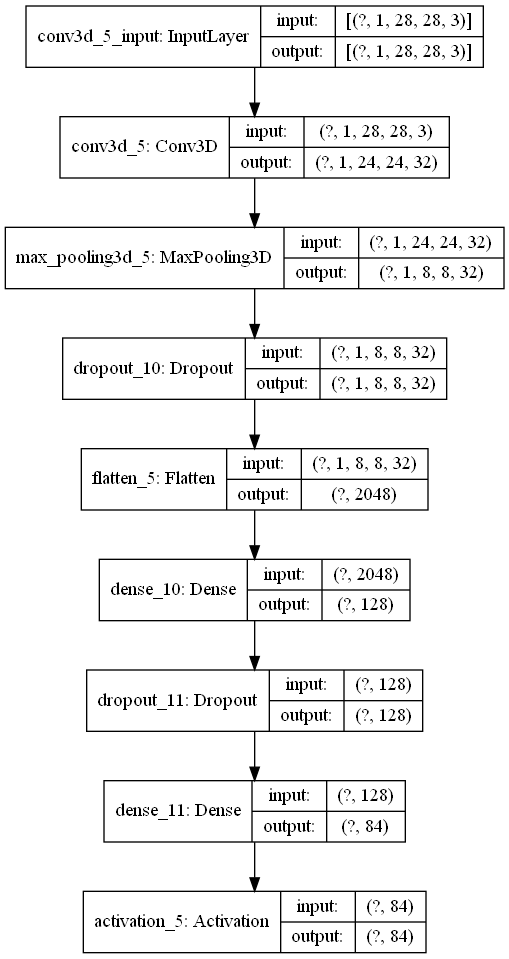

In [211]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model    
plot_model(model, to_file='3DCNN.png', show_shapes=True, show_layer_names=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 1, 24, 24, 32)     2432      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 1, 8, 8, 32)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 8, 8, 32)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

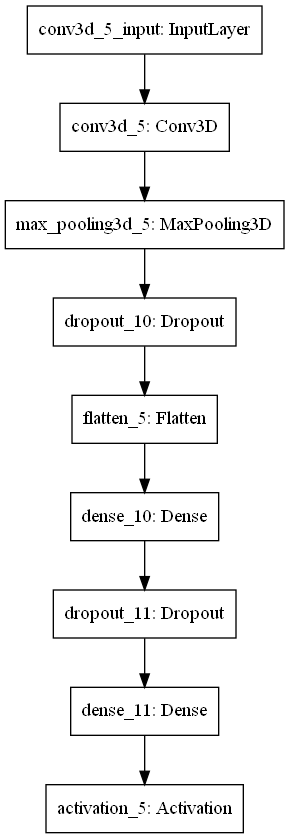

In [212]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
model.summary()
plot_model(model, to_file='3DCNN.png')

168/168 [==============================] - 16s 96ms/step - loss: 0.6156 - accuracy: 0.8529
**********************************************
Test score: [0.6156384944915771, 0.8529166579246521]
History {'loss': [1.7931984663009644, 1.067354679107666, 0.934980571269989, 0.8573479652404785, 0.7985624074935913, 0.7577638030052185, 0.7220361828804016, 0.6899807453155518, 0.6605793237686157, 0.6412088871002197, 0.6156347990036011, 0.5968056917190552, 0.5796809792518616, 0.5618888735771179, 0.5504575967788696, 0.5378937125205994, 0.5230705738067627, 0.5132380127906799, 0.5024848580360413, 0.4977748990058899, 0.48758792877197266, 0.4790705740451813, 0.4684368073940277, 0.4671191871166229, 0.4572526514530182, 0.4577324688434601, 0.45261889696121216, 0.44433730840682983, 0.4339267909526825, 0.4304823875427246, 0.42572057247161865, 0.4213622510433197, 0.42156219482421875, 0.4167705774307251, 0.4122147858142853, 0.40522995591163635, 0.40703076124191284, 0.404582679271698, 0.4040504992008209, 0.39117

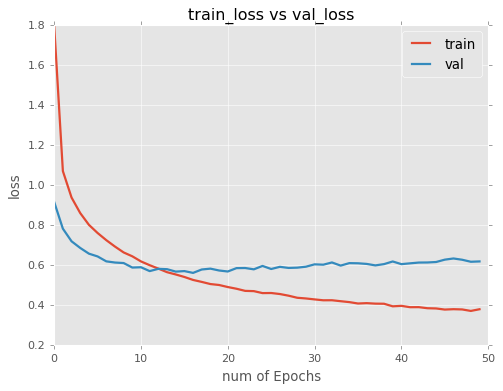

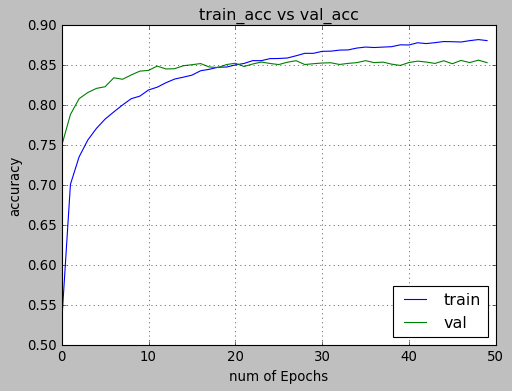

In [213]:
# Evaluate the model
score = model.evaluate(
    X_val_new,
    y_val_new,
    batch_size=batch_size
    )
print('**********************************************')
print('Test score:', score)

print('History', hist.history)

# Plot the results
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(50)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.style.use(['bmh'])
plt.style.use(['ggplot'])

In [214]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
    for img in images:
        img = image.load_img(img, target_size=(299, 299))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        char_list.sort()
        pred_value = char_list[index]
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

In [215]:
from PIL import Image
img0 = Image.open('0.jpg')
img1 = Image.open('1.jpg')
img2 = Image.open('2.jpg')
img3 = Image.open('3.jpg')
img4 = Image.open('4.jpg')
img5 = Image.open('5.jpg')
img6 = Image.open('6.jpg')
img7 = Image.open('7.jpg')
img8 = Image.open('8.jpg')
img9 = Image.open('9.jpg')

In [216]:
images = []
images.append('0.jpg')
images.append('1.jpg')
images.append('2.jpg')
images.append('3.jpg')
images.append('4.jpg')
images.append('5.jpg')
images.append('6.jpg')
images.append('7.jpg')
images.append('8.jpg')
images.append('9.jpg')


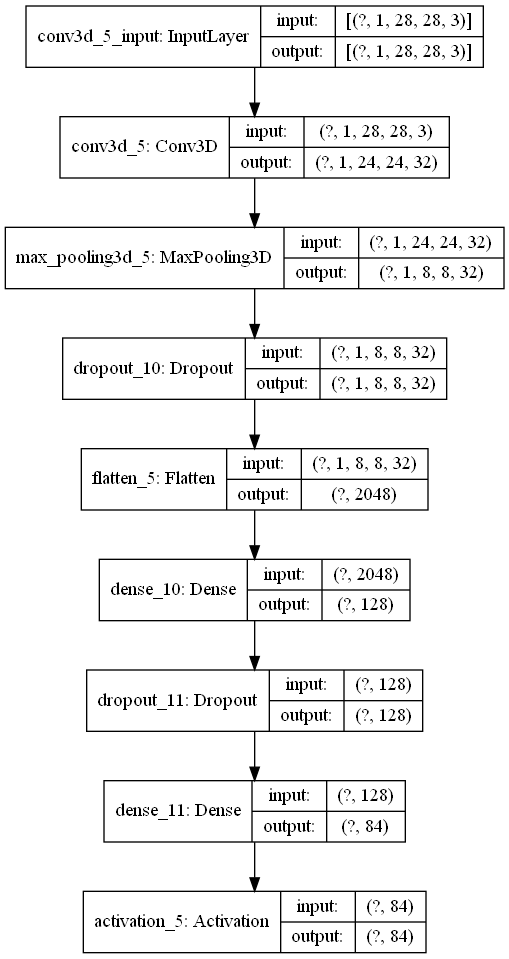

In [217]:
# example of a convolutional neural network
from keras.utils import plot_model
from keras.models import Model



from IPython.display import Image 

plot_model(model, show_shapes=True, show_layer_names=True, to_file='3DCNN.png')